## Prediction of icu need based on the COVID_19 Data_set

#### Importing General use libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
import datetime as dt
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
#Reading the CSV file

In [3]:
df = pd.read_csv("covid.csv")
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,4/5/2020,2/5/2020,9999-99-99,97,2,27,97,...,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,...,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,6/4/2020,1/4/2020,9999-99-99,2,2,54,2,...,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10/4/2020,9999-99-99,2,1,30,97,...,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,...,2,1,2,1,2,2,2,99,1,2


#Analysing the data_set

In [4]:
df.shape

(566602, 23)

In [5]:
df.isnull().sum()

id                     0
sex                    0
patient_type           0
entry_date             0
date_symptoms          0
date_died              0
intubed                0
pneumonia              0
age                    0
pregnancy              0
diabetes               0
copd                   0
asthma                 0
inmsupr                0
hypertension           0
other_disease          0
cardiovascular         0
obesity                0
renal_chronic          0
tobacco                0
contact_other_covid    0
covid_res              0
icu                    0
dtype: int64

In [6]:
df.describe()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
count,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000
mean,1.506726,1.215165,76.562952,1.846262,42.622483,50.400692,2.210633,2.280221,2.265029,2.319628,2.145774,2.410030,2.286157,2.138905,2.283765,2.238360,31.573034,1.728651,76.562864
std,0.499955,0.410937,39.058676,0.560939,16.659973,47.501579,5.683523,5.327832,5.334658,5.667381,5.459866,6.489959,5.438405,5.395578,5.393232,5.571901,45.082123,0.658710,39.059060
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,97.000000,2.000000,31.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,97.000000
50%,2.000000,1.000000,97.000000,2.000000,41.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,97.000000
75%,2.000000,1.000000,97.000000,2.000000,53.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,99.000000,2.000000,97.000000
max,2.000000,2.000000,99.000000,99.000000,120.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,99.000000,3.000000,99.000000


In [7]:
df.corr()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
sex,1.000000,0.097025,-0.097029,-0.054758,0.036709,0.994293,0.008153,0.009339,0.010119,0.008096,0.009019,0.010155,0.008344,0.010199,0.008577,0.004980,-0.001791,-0.047575,-0.097024
patient_type,0.097025,1.000000,-0.999319,-0.420400,0.325059,0.095472,0.002315,0.013227,0.016670,0.016359,0.000274,0.028232,0.016446,0.014967,0.013240,0.016603,0.228929,-0.135931,-0.999314
intubed,-0.097029,-0.999319,1.000000,0.421256,-0.324869,-0.095481,-0.002456,-0.013363,-0.016807,-0.016424,-0.000419,-0.028389,-0.016587,-0.015101,-0.013384,-0.016738,-0.228811,0.135738,0.999989
pneumonia,-0.054758,-0.420400,0.421256,1.000000,-0.183492,-0.054031,-0.002875,-0.008592,-0.010370,-0.010979,-0.001568,-0.019541,-0.010392,-0.010070,-0.008296,-0.009996,-0.074756,0.093832,0.421182
age,0.036709,0.325059,-0.324869,-0.183492,1.000000,0.036239,0.000556,0.014440,0.018668,0.018625,-0.008617,0.018627,0.015049,0.012068,0.016643,0.017531,0.099339,-0.102643,-0.324791
pregnancy,0.994293,0.095472,-0.095481,-0.054031,0.036239,1.000000,0.016239,0.018035,0.018931,0.016412,0.017474,0.017392,0.016854,0.018692,0.016970,0.013060,-0.003185,-0.047589,-0.095474
diabetes,0.008153,0.002315,-0.002456,-0.002875,0.000556,0.016239,1.000000,0.838368,0.843817,0.794140,0.845727,0.688245,0.821716,0.765574,0.817052,0.777978,0.002895,0.005156,-0.002429
copd,0.009339,0.013227,-0.013363,-0.008592,0.014440,0.018035,0.838368,1.000000,0.922057,0.866870,0.872321,0.748066,0.893562,0.827598,0.889774,0.844021,0.010322,0.000882,-0.013308
asthma,0.010119,0.016670,-0.016807,-0.010370,0.018668,0.018931,0.843817,0.922057,1.000000,0.886307,0.883549,0.756712,0.906039,0.839128,0.901793,0.855136,0.010714,0.000276,-0.016759
inmsupr,0.008096,0.016359,-0.016424,-0.010979,0.018625,0.016412,0.794140,0.866870,0.886307,1.000000,0.844534,0.800965,0.872862,0.804051,0.866491,0.821285,0.010554,-0.000914,-0.016299


In [8]:
df['entry_date']

0           4/5/2020
1         19-03-2020
2           6/4/2020
3         17-04-2020
4         13-04-2020
             ...    
566597    13-05-2020
566598      7/4/2020
566599    14-05-2020
566600    31-05-2020
566601    16-05-2020
Name: entry_date, Length: 566602, dtype: object

##Converting date columns in proper manner

In [9]:
def date_fn(x):
    if "-" in x:
        split_ = x.split("-")
    elif "/" in x:
        split_ = x.split("/")
    dd,mm,yy = split_[0],split_[1],split_[-1]
    return ("{}-{}-{}".format(dd,mm,yy))

In [10]:
df['entry_date'].apply(lambda x: date_fn(x))

0           4-5-2020
1         19-03-2020
2           6-4-2020
3         17-04-2020
4         13-04-2020
             ...    
566597    13-05-2020
566598      7-4-2020
566599    14-05-2020
566600    31-05-2020
566601    16-05-2020
Name: entry_date, Length: 566602, dtype: object

In [11]:
df["entry_date"] = pd.to_datetime(df['entry_date'])

In [12]:
df['date_symptoms']=pd.DataFrame(df['date_symptoms'].apply(lambda x: date_fn(x)))

In [13]:
df['entry_date'].dt.year

0         2020
1         2020
2         2020
3         2020
4         2020
          ... 
566597    2020
566598    2020
566599    2020
566600    2020
566601    2020
Name: entry_date, Length: 566602, dtype: int64

In [14]:
df['icu'].value_counts()

97    444689
2     111676
1      10112
99       125
Name: icu, dtype: int64

In [15]:
df['sex'].value_counts()

2    287112
1    279490
Name: sex, dtype: int64

In [16]:
df['pregnancy'].value_counts()

97    287112
2     273840
1       4063
98      1587
Name: pregnancy, dtype: int64

#### Handling the missing values

In [17]:
df['sex'].replace([1,2],[0,1],inplace=True)
df['patient_type'].replace([1,2],[0,1],inplace=True)

In [18]:
columns = ['intubed','pneumonia','pregnancy','diabetes','copd',
    'asthma','inmsupr','hypertension','other_disease','cardiovascular',
    'obesity','renal_chronic','tobacco','contact_other_covid','icu']

In [19]:
binary_columns = df[columns].replace(2,0).replace([97,98,99],2)
df2 = df.drop(columns,axis=1)
df2[columns] = binary_columns
df2.reindex(columns=list(df.columns)).head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,1,0,2020-04-05,2-5-2020,9999-99-99,2,0,27,2,...,0,0,0,0,0,0,0,0,1,2
1,1009bf,1,0,2020-03-19,17-03-2020,9999-99-99,2,0,24,2,...,0,0,0,0,0,0,0,2,1,2
2,167386,0,1,2020-06-04,1-4-2020,9999-99-99,0,0,54,0,...,0,0,0,0,1,0,0,2,1,0
3,0b5948,1,1,2020-04-17,10-4-2020,9999-99-99,0,1,30,2,...,0,0,0,0,0,0,0,2,1,0
4,0d01b5,0,1,2020-04-13,13-04-2020,22-04-2020,0,0,60,0,...,0,1,0,1,0,0,0,2,1,0


In [20]:
df2['covid_res'].replace([2,3],[0,2],inplace=True)

## EDA

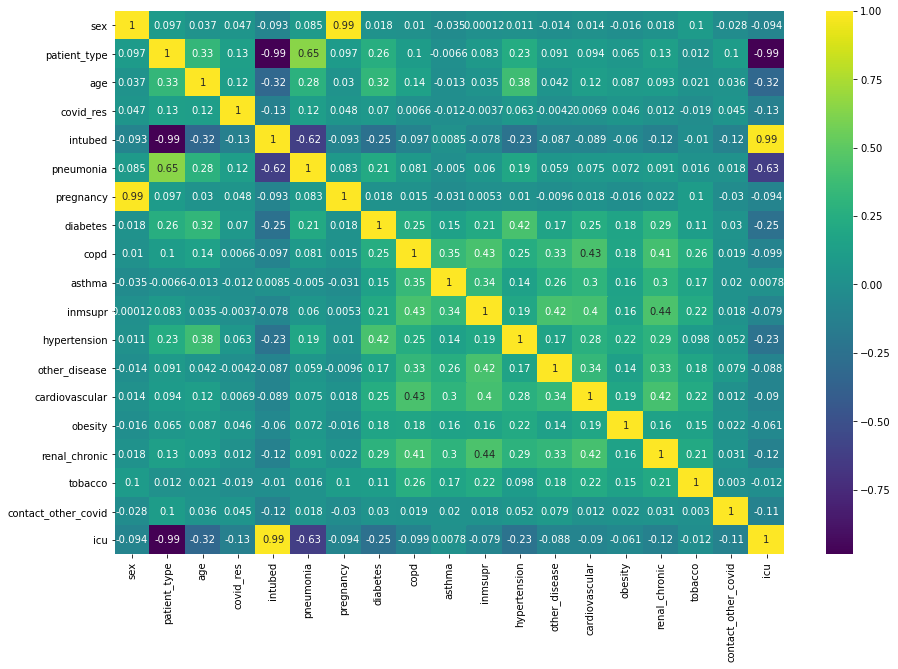

In [21]:
plt.figure(figsize=(15,10))
sns.heatmap(df2.corr(),annot=True,cmap='viridis')
plt.show()
#ICU is mostly corrilated with Patient_type,intubed,Pneumonia

##### From the above chart we can analyse that the ICU is mostly correlated with Patient_type,intubed,Pneumonia

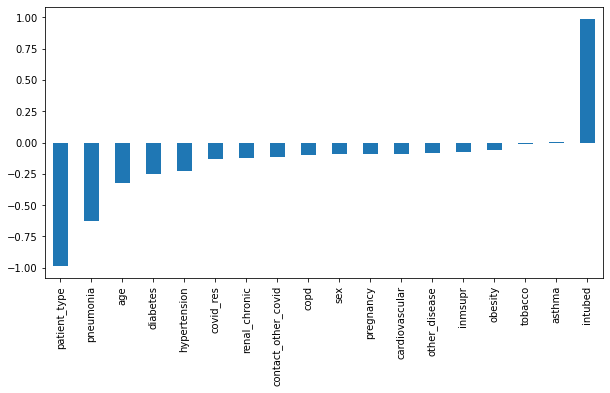

In [22]:
plt.figure(figsize=(10,5))
df2.corr()['icu'][:-1].sort_values().plot(kind='bar')
plt.show()
#ICU is mostly corrilated with Patient_type,intubed,Pneumonia

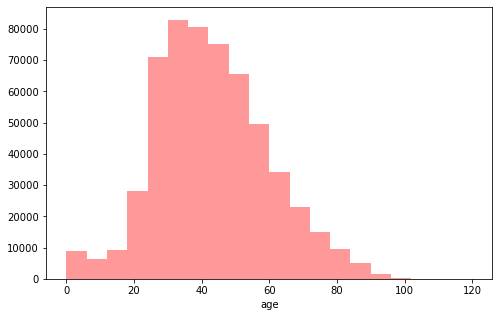

In [23]:
plt.figure(figsize=(8,5))
sns.distplot(df2['age'],kde=False,bins=20,color = "red")
plt.show()
#age of 30 to 50 are more affected.

#####  From the above graph we can observe that the age of 30 to 50 are more affected by the COVID_19

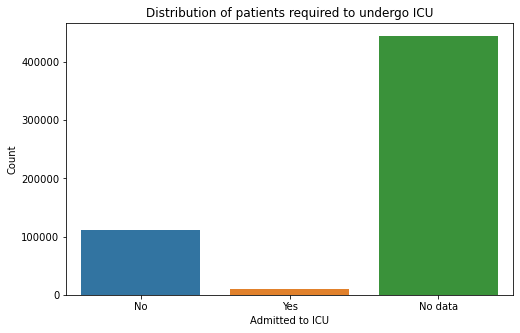

In [24]:
plt.figure(figsize=(8,5))
sns.countplot(x='icu',data=df2)
plt.title('Distribution of patients required to undergo ICU')
plt.xlabel('Admitted to ICU')
plt.ylabel('Count')
plt.xticks([0,1,2],['No','Yes','No data'])
plt.show()

##### Above graph shows that very few patients got into the icu and lots of data is missing

In [25]:
df3 = df2[df2['icu'].isin([0,1])]
df3.shape
#Droping missing data in icu column

(121788, 23)

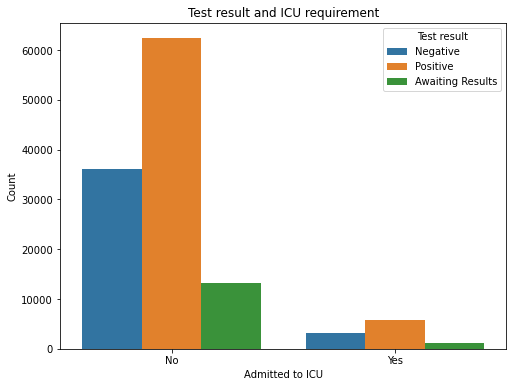

In [26]:
plt.figure(figsize=(8,6))

plot = sns.countplot(x='icu',hue='covid_res',data=df3)
plot.legend_.set_title('Test result')
labels = ['Negative','Positive','Awaiting Results']
for text, label in zip(plot.legend_.texts, labels): 
    text.set_text(label)

plt.title('Test result and ICU requirement')
plt.xlabel('Admitted to ICU')
plt.ylabel('Count')
plt.xticks([0,1],['No','Yes'])

plt.show()

##### Above graph reveals that the most of the positive patients didn't go to the icu

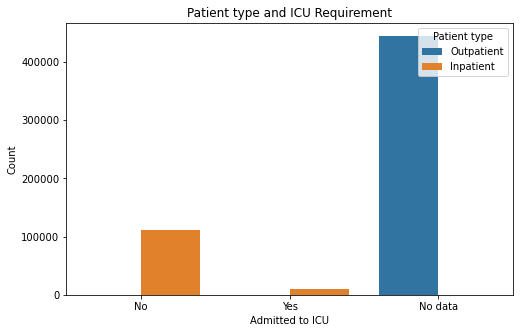

In [27]:
plt.figure(figsize=(8,5))

plot = sns.countplot(x='icu',hue='patient_type',data=df2)
plot.legend_.set_title('Patient type')
labels = ['Outpatient','Inpatient']
for text, label in zip(plot.legend_.texts, labels): 
    text.set_text(label)

plt.title('Patient type and ICU Requirement')
plt.xlabel('Admitted to ICU')
plt.ylabel('Count')
plt.xticks([0,1,2],['No','Yes','No data'])

plt.show()

##### Above graph shows that the lots of outpatient data is missing and very few inpatient types got the icu

In [28]:
icu_status = ['Not admitted','Admitted','No data']

for i in range(3):
    print(icu_status[i])
    print(df2[df2['icu']==i]['patient_type'].value_counts().rename({0:'Outpatient',1:'Inpatient'}).to_dict())
    print()

Not admitted
{'Inpatient': 111676}

Admitted
{'Inpatient': 10112}

No data
{'Outpatient': 444689, 'Inpatient': 125}



In [29]:
df4 = df3.drop('patient_type',axis='columns')
df4.head()
#droping patient_type column

,id,sex,entry_date,date_symptoms,date_died,age,covid_res,intubed,pneumonia,pregnancy,...,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,icu
2,167386,0,2020-06-04,1-4-2020,9999-99-99,54,1,0,0,0,...,0,0,0,0,0,1,0,0,2,0
3,0b5948,1,2020-04-17,10-4-2020,9999-99-99,30,1,0,1,2,...,0,0,0,0,0,0,0,0,2,0
4,0d01b5,0,2020-04-13,13-04-2020,22-04-2020,60,1,0,0,0,...,0,0,1,0,1,0,0,0,2,0
5,1beec8,1,2020-04-16,16-04-2020,29-04-2020,47,1,0,1,2,...,0,0,0,0,0,0,0,0,2,1
6,1.75E+56,1,2020-04-22,13-04-2020,9999-99-99,63,1,0,0,2,...,0,0,1,0,0,0,0,0,2,0


In [30]:
#Creating num_days_symptoms to see the number of days passed when the symptoms occured before testing.
df4['entry_date'] = pd.to_datetime(df4['entry_date'],dayfirst=True)
df4['date_symptoms'] = pd.to_datetime(df4['date_symptoms'],dayfirst=True)
df4['num_days_symptoms'] = (df4['entry_date'] - df4['date_symptoms']).apply(lambda x: x.days)
df4['num_days_symptoms'].head()

2    64
3     7
4     0
5     0
6     9
Name: num_days_symptoms, dtype: int64

### Feature engineering

In [31]:
# dropping female patients with missing value in pregnancy
df5 = df4.drop(df4[(df4['pregnancy']==2) & (df4['sex']==0)].index,axis='index')

# converting missing values into not pregnant since they are all male
df5['pregnancy'].replace(2,0,inplace=True)
df5['pregnancy'].value_counts()

0    120553
1      1069
Name: pregnancy, dtype: int64

In [32]:
#Checking messing values
columns = [
    'intubed','pneumonia','pregnancy','diabetes','copd',
    'asthma','inmsupr','hypertension','other_disease','cardiovascular',
    'obesity','renal_chronic','tobacco','contact_other_covid','icu'
]
legend = {0:'No',1:'Yes',2:'No data'}

for column in columns:
    print('{}: {}'.format(column,df5[column].value_counts().rename(legend).to_dict()))

intubed: {'No': 111686, 'Yes': 9936}
pneumonia: {'Yes': 73577, 'No': 48045}
pregnancy: {'No': 120553, 'Yes': 1069}
diabetes: {'No': 85555, 'Yes': 35404, 'No data': 663}
copd: {'No': 115557, 'Yes': 5487, 'No data': 578}
asthma: {'No': 117907, 'Yes': 3137, 'No data': 578}
inmsupr: {'No': 116237, 'Yes': 4714, 'No data': 671}
hypertension: {'No': 80763, 'Yes': 40257, 'No data': 602}
other_disease: {'No': 113317, 'Yes': 7272, 'No data': 1033}
cardiovascular: {'No': 114687, 'Yes': 6295, 'No data': 640}
obesity: {'No': 95927, 'Yes': 25068, 'No data': 627}
renal_chronic: {'No': 113791, 'Yes': 7228, 'No data': 603}
tobacco: {'No': 110264, 'Yes': 10726, 'No data': 632}
contact_other_covid: {'No data': 62043, 'No': 42351, 'Yes': 17228}
icu: {'No': 111529, 'Yes': 10093}


In [33]:
columns = ['diabetes','copd','asthma',
    'inmsupr','hypertension','other_disease','cardiovascular',
    'obesity','renal_chronic','tobacco']
    
# dropping contact_other_covid column
df6 = df5.drop('contact_other_covid',axis='columns')

# dropping all rows with missing values
df7 = df6[columns].replace(2,np.nan).dropna().astype('int8').merge(
            df6[['id','sex', 'entry_date', 'date_symptoms', 'date_died', 'age',
           'covid_res','intubed', 'pneumonia', 'pregnancy','icu', 'num_days_symptoms']],
            left_index=True, right_index=True
        )

In [34]:
covid_results = pd.get_dummies(df7['covid_res'].replace({0:'covid_negative',1:'covid_positive'}),drop_first=True)
covid_results.head()

,covid_negative,covid_positive
2,0,1
3,0,1
4,0,1
5,0,1
6,0,1


In [35]:
df8 = pd.concat([df7,covid_results],axis='columns')

In [36]:
columns = ['sex','age','num_days_symptoms','intubed', 
           'pneumonia', 'pregnancy','diabetes', 'copd', 'asthma',
           'inmsupr', 'hypertension','other_disease', 'cardiovascular', 'obesity',
           'renal_chronic','tobacco','covid_negative','covid_positive','icu']

# dropped id, entry_date, date_symptoms, date_died, covid_res
df9 = df8[columns]


In [37]:
df9.head()

,sex,age,num_days_symptoms,intubed,pneumonia,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,covid_negative,covid_positive,icu
2,0,54,64,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,1,30,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,60,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0
5,1,47,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1
6,1,63,9,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


## Modeling

In [38]:
# Performing oversampling using SMOTE
from imblearn.over_sampling import SMOTE

In [39]:
#Using scaler
from sklearn.preprocessing import MinMaxScaler

In [40]:
X = df9.drop('icu',axis='columns')
y = df9['icu']

icu_before_oversampling = y.value_counts()
print('ICU values before oversampling')
print(f'0: {icu_before_oversampling[0]}')
print(f'1: {icu_before_oversampling[1]}')

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

icu_after_oversampling = y_res.value_counts()
print('\nICU values after oversampling')
print(f'0: {icu_after_oversampling[0]}')
print(f'1: {icu_after_oversampling[1]}')

ICU values before oversampling
0: 110201
1: 9825

ICU values after oversampling
0: 110201
1: 110201


In [41]:
from sklearn.model_selection import train_test_split,cross_val_score

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.30, random_state=0,stratify=y_res)
print('Lenght of training data:',len(X_train))
print('Lenght of testing data:',len(X_test))

Lenght of training data: 154281
Lenght of testing data: 66121


In [43]:
from sklearn.metrics import precision_score,recall_score,fbeta_score,confusion_matrix,plot_confusion_matrix

In [44]:
scaler = MinMaxScaler()

# fit and transfrom
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
X_train.shape

(154281, 18)

In [46]:
# Creating classification_matrix for scores
def classification_matrix(y_actual,y_predicted):
    precision = precision_score(y_actual,y_predicted)
    recall = recall_score(y_actual,y_predicted)
    fb = fbeta_score(y_actual,y_predicted,beta=1)
    print("precision :{}  Recall :{}  F1_score :{}".format(precision,recall,fb))
    return(precision,recall,fb)
  

#### Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

In [48]:
max_depth = np.arange(1,100)
for d in max_depth:
    model = DecisionTreeClassifier(max_depth=d)
    model.fit(X_train,y_train)
    y_train_pre = model.predict(X_train)
    print(f"train{d}")
    classification_matrix(y_train,y_train_pre)
    y_test_pre = model.predict(X_test)
    print(f"test{d}")
    classification_matrix(y_test,y_test_pre)
    print("\n")

train1
precision :0.8966861598440545  Recall :0.37567571071155414  F1_score :0.5295084962543395
test1
precision :0.8983223182511438  Recall :0.3741379310344828  F1_score :0.528262401503342


train2
precision :0.8895993413830955  Recall :0.4202304870302433  F1_score :0.5708173021896268
test2
precision :0.8906924315619967  Recall :0.41826981246218997  F1_score :0.5692291859627456


train3
precision :0.8898923904688701  Recall :0.4202304870302433  F1_score :0.5708776162509136
test3
precision :0.890979381443299  Recall :0.41826981246218997  F1_score :0.5692877727459861


train4
precision :0.8929558011049724  Recall :0.4190378657263971  F1_score :0.5704025904130016
test4
precision :0.8927113702623907  Recall :0.4167876588021779  F1_score :0.5682647695638726


train5
precision :0.8928778387924612  Recall :0.41945269052773493  F1_score :0.5707708590580349
test5
precision :0.8921803246879244  Recall :0.41724137931034483  F1_score :0.5685785536159601


train6
precision :0.6753041668162079  Reca

train44
precision :0.93389501788323  Recall :0.9612916607251656  F1_score :0.9473953176402952
test44
precision :0.830007246780757  Recall :0.900756200846945  F1_score :0.863935710348429


train45
precision :0.93389501788323  Recall :0.9612916607251656  F1_score :0.9473953176402952
test45
precision :0.8307606420097697  Recall :0.9002419842710224  F1_score :0.8641068447412353


train46
precision :0.93389501788323  Recall :0.9612916607251656  F1_score :0.9473953176402952
test46
precision :0.8302507880715262  Recall :0.9002419842710224  F1_score :0.8638309605700437


train47
precision :0.93389501788323  Recall :0.9612916607251656  F1_score :0.9473953176402952
test47
precision :0.8301865744485037  Recall :0.9004234724742892  F1_score :0.8638797393966656


train48
precision :0.93389501788323  Recall :0.9612916607251656  F1_score :0.9473953176402952
test48
precision :0.8297415595639689  Recall :0.9002419842710224  F1_score :0.863555252506202


train49
precision :0.93389501788323  Recall :0.96

train87
precision :0.93389501788323  Recall :0.9612916607251656  F1_score :0.9473953176402952
test87
precision :0.8308684004911262  Recall :0.9006352087114338  F1_score :0.8643462610311193


train88
precision :0.93389501788323  Recall :0.9612916607251656  F1_score :0.9473953176402952
test88
precision :0.8302781730420468  Recall :0.9001209921355112  F1_score :0.8637900756157385


train89
precision :0.93389501788323  Recall :0.9612916607251656  F1_score :0.9473953176402952
test89
precision :0.8302155064261618  Recall :0.900756200846945  F1_score :0.8640485136879978


train90
precision :0.93389501788323  Recall :0.9612916607251656  F1_score :0.9473953176402952
test90
precision :0.8304527207850134  Recall :0.9010889292196007  F1_score :0.8643300644113039


train91
precision :0.93389501788323  Recall :0.9612916607251656  F1_score :0.9473953176402952
test91
precision :0.8307576433831734  Recall :0.9008166969147006  F1_score :0.8643698844836593


train92
precision :0.93389501788323  Recall :0

#### Best Score from Decision Tree

>Best Score from Decision Tree
train37
precision :0.933716962363222  Recall :0.961265734175082  F1_score 0.9472910997841055:
test37
precision :0.8303439426483304  Recall :0.9003932244404114  F1_score 0.8639510078509337:

In [49]:
#Scalling the data
scaler1 = StandardScaler()
x_train_scaled = scaler1.fit_transform(X_train)
x_test_scaled = scaler1.transform(X_test)

In [50]:
#DT by scaled data
max_depth = np.arange(1,30)
for d2 in max_depth:
    model = DecisionTreeClassifier(max_depth=d2)
    model.fit(x_train_scaled,y_train)
    y_train_pre = model.predict(x_train_scaled)
    print(f"train{d2}")
    classification_matrix(y_train,y_train_pre)
    y_test_pre = model.predict(x_test_scaled)
    print(f"test{d2}")
    classification_matrix(y_test,y_test_pre)
    print("\n")

train1
precision :0.8966861598440545  Recall :0.37567571071155414  F1_score :0.5295084962543395
test1
precision :0.8983223182511438  Recall :0.3741379310344828  F1_score :0.528262401503342


train2
precision :0.8895993413830955  Recall :0.4202304870302433  F1_score :0.5708173021896268
test2
precision :0.8906924315619967  Recall :0.41826981246218997  F1_score :0.5692291859627456


train3
precision :0.8898923904688701  Recall :0.4202304870302433  F1_score :0.5708776162509136
test3
precision :0.890979381443299  Recall :0.41826981246218997  F1_score :0.5692877727459861


train4
precision :0.8929558011049724  Recall :0.4190378657263971  F1_score :0.5704025904130016
test4
precision :0.8927113702623907  Recall :0.4167876588021779  F1_score :0.5682647695638726


train5
precision :0.8928778387924612  Recall :0.41945269052773493  F1_score :0.5707708590580349
test5
precision :0.8921803246879244  Recall :0.41724137931034483  F1_score :0.5685785536159601


train6
precision :0.6753041668162079  Reca

>DT Best score on scaled data
train29
precision :0.9176697819314642  Recall :0.9546544639037606  F1_score 0.9357968371762044:
test29
precision :0.8210637060826712  Recall :0.8970356926799758  F1_score 0.8573700111305455:

#### Random forest

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
RF_model = RandomForestClassifier(n_estimators=300,criterion="entropy",class_weight={1:2,0:0.5},max_depth=10,n_jobs=-1)
RF_model.fit(X_train,y_train)
y_train_pr = RF_model.predict(X_train)
y_test_pr = RF_model.predict(X_test)
print("Train_d")
print(classification_matrix(y_train,y_train_pr))
print("Test_d")
print(classification_matrix(y_test,y_test_pr))

Train_d
precision :0.554279112351223  Recall :0.9888515834640463  F1_score :0.7103737608433484
(0.554279112351223, 0.9888515834640463, 0.7103737608433484)
Test_d
precision :0.5513655195738564  Recall :0.986237144585602  F1_score :0.7073051683930799
(0.5513655195738564, 0.986237144585602, 0.7073051683930799)


In [53]:
max_depth = np.arange(1,30)
for d1 in max_depth:
    RF_model = RandomForestClassifier(n_estimators=300,criterion="entropy",class_weight={1:2,0:0.5},max_depth=d1,n_jobs=-1)
    RF_model.fit(X_train,y_train)
    y_train_pr = RF_model.predict(X_train)
    y_test_pr = RF_model.predict(X_test)
    print(f"train{d1}")
    print(classification_matrix(y_train,y_train_pr))
    print(f"Test{d1}")
    print(classification_matrix(y_test,y_test_pr))

train1
precision :0.5000032408397664  Recall :1.0  F1_score :0.6666695474069018
(0.5000032408397664, 1.0, 0.6666695474069018)
Test1
precision :0.4999924381058968  Recall :1.0  F1_score :0.6666599449491335
(0.4999924381058968, 1.0, 0.6666599449491335)
train2
precision :0.5000421341941673  Recall :1.0  F1_score :0.6667041182317099
(0.5000421341941673, 1.0, 0.6667041182317099)
Test2
precision :0.5000302498638756  Recall :1.0  F1_score :0.6666935548923126
(0.5000302498638756, 1.0, 0.6666935548923126)
train3
precision :0.5012806011674922  Recall :0.9996499915738712  F1_score :0.6677259443662733
(0.5012806011674922, 0.9996499915738712, 0.6677259443662733)
Test3
precision :0.5012131505519835  Recall :0.9997580157289776  F1_score :0.6676901943355824
(0.5012131505519835, 0.9997580157289776, 0.6676901943355824)
train4
precision :0.5058580153674395  Recall :0.9985221866452341  F1_score :0.6715196742963503
(0.5058580153674395, 0.9985221866452341, 0.6715196742963503)
Test4
precision :0.505274116260

train28
precision :0.8550921241368574  Recall :0.9968888139899664  F1_score :0.9205621461148952
(0.8550921241368574, 0.9968888139899664, 0.9205621461148952)
Test28
precision :0.7957481230567002  Recall :0.9521778584392014  F1_score :0.8669631914512731
(0.7957481230567002, 0.9521778584392014, 0.8669631914512731)
train29
precision :0.8703647124056534  Recall :0.9970702998405517  F1_score :0.9294190149354729
(0.8703647124056534, 0.9970702998405517, 0.9294190149354729)
Test29
precision :0.8077743784867728  Recall :0.9503932244404114  F1_score :0.8732993315452285
(0.8077743784867728, 0.9503932244404114, 0.8732993315452285)


#### Random_Forest best Score

>Random_Forest best Score
train29
precision :0.8711570266657604  Recall :0.9969277038150919  F1_score 0.9298085467812042:
(0.8711570266657604, 0.9969277038150919, 0.9298085467812042)
Test29
precision :0.808217062245791  Recall :0.9496672716273442  F1_score 0.873251189052374:
(0.808217062245791, 0.9496672716273442, 0.873251189052374)

#### Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
LR_model = LogisticRegression()

In [56]:
LR_model.fit(X_train,y_train)

LogisticRegression()

In [57]:
y_train_predict = LR_model.predict(X_train)

In [58]:
y_train_prob = LR_model.predict_proba(X_train)

In [59]:
y_test_predict = LR_model.predict(X_test)

In [60]:
y_test_prob = LR_model.predict_proba(X_test)

In [61]:
y_train_prob

array([[0.21117222, 0.78882778],
       [0.42584837, 0.57415163],
       [0.8269905 , 0.1730095 ],
       ...,
       [0.33596161, 0.66403839],
       [0.88633915, 0.11366085],
       [0.66378177, 0.33621823]])

In [62]:
def proba_class(y_proba,threshold = 0.5):
    predicted_class = [1 if a[1] > threshold else 0 for a in y_proba]
  #print(predicted_class)
    return np.array(predicted_class)

In [63]:
y_pred_train = proba_class(y_train_prob,0.5)
confusion_matrix(y_train,y_pred_train)

array([[62012, 15128],
       [27972, 49169]], dtype=int64)

In [64]:
y_pred_test = proba_class(y_test_prob,0.5)
confusion_matrix(y_test,y_pred_test)

array([[26589,  6472],
       [12069, 20991]], dtype=int64)

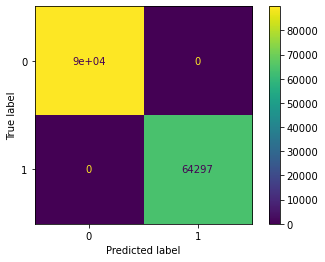

In [65]:
## Visualize your confusion Matrix
plot_confusion_matrix(LR_model,X_train,y_pred_train)
plt.show()

In [66]:
classification_matrix(y_train,y_pred_train)

precision :0.7647168608177676  Recall :0.6373912705305869  F1_score :0.6952728403964987


(0.7647168608177676, 0.6373912705305869, 0.6952728403964987)

In [67]:
classification_matrix(y_test,y_pred_test)

precision :0.7643374722353712  Recall :0.6349364791288566  F1_score :0.693653652330519


(0.7643374722353712, 0.6349364791288566, 0.693653652330519)

In [68]:
thresholds = []
prec = []
recall = []
fbe = []
for threshold in range(10,100,10):
    thr = threshold/100
    y_pred_train1 = proba_class(y_train_prob,thr)
    p,r,f = classification_matrix(y_train,y_pred_train1)
    print(f"Threshold{thr}")
    prec.append(p)
    recall.append(r)
    fbe.append(f)
    thresholds.append(thr)

precision :0.5246360313530787  Recall :0.9917423937983693  F1_score :0.6862453131447229
Threshold0.1
precision :0.5594321823245785  Recall :0.9686159111237863  F1_score :0.7092380342184571
Threshold0.2
precision :0.6034441541587692  Recall :0.916231316679846  F1_score :0.7276480308029671
Threshold0.3
precision :0.673939498368459  Recall :0.8112417521162546  F1_score :0.7362439558112447
Threshold0.4
precision :0.7647168608177676  Recall :0.6373912705305869  F1_score :0.6952728403964987
Threshold0.5
precision :0.8359857896790357  Recall :0.5277349269519451  F1_score :0.6470223620845849
Threshold0.6
precision :0.8802879151408006  Recall :0.45183495158216774  F1_score :0.5971594024122807
Threshold0.7
precision :0.9155675363435063  Recall :0.3698422369427412  F1_score :0.5268600764528818
Threshold0.8
precision :0.9400151143019082  Recall :0.2579950998820342  F1_score :0.4048701595923224
Threshold0.9


In [69]:
thresholds = []
prec = []
recall = []
fbe = []
for threshold in range(10,100,10):
    thr = threshold/100
    y_pred_test1 = proba_class(y_test_prob,thr)
    p,r,f = classification_matrix(y_test,y_pred_test1)
    print(f"Threshold{thr}")
    prec.append(p)
    recall.append(r)
    fbe.append(f)
    thresholds.append(thr)

precision :0.5238818376546565  Recall :0.991318814277072  F1_score :0.685498546298814
Threshold0.1
precision :0.559917463759246  Recall :0.9685420447670902  F1_score :0.7096080756147018
Threshold0.2
precision :0.6028282747921556  Recall :0.9167876588021778  F1_score :0.727375266985049
Threshold0.3
precision :0.6715544730961408  Recall :0.8090139140955838  F1_score :0.7339031651734877
Threshold0.4
precision :0.7643374722353712  Recall :0.6349364791288566  F1_score :0.693653652330519
Threshold0.5
precision :0.837353748374982  Recall :0.526043557168784  F1_score :0.6461572758178676
Threshold0.6
precision :0.8798768574980759  Recall :0.449546279491833  F1_score :0.5950631618986607
Threshold0.7
precision :0.913808732436924  Recall :0.3659104658197217  F1_score :0.5225711693809667
Threshold0.8
precision :0.9397415905546892  Recall :0.25520266182698126  F1_score :0.40139873447832913
Threshold0.9


#### Best Scores from Logistic R

>Best Scores from Logistic R
Threshold0.3
precision :0.673939498368459  Recall :0.8112417521162546  F1_score 0.7362439558112447:
Threshold0.4
precision :0.7647168608177676  Recall :0.6373912705305869  F1_score 0.6952728403964987:

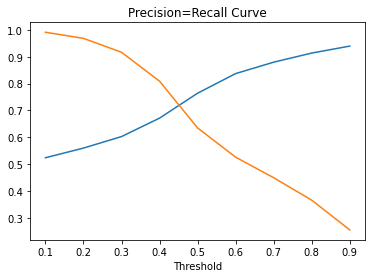

In [70]:
sns.lineplot(x=thresholds,y=prec)
sns.lineplot(x=thresholds,y=recall)
plt.xlabel("Threshold")
plt.title("Precision=Recall Curve")
plt.show()

In [ ]:
#ROC AUC Curve
from sklearn.metrics import roc_curve
fpr,tpr,threshold = roc_curve(y_train,[a[1] for a in y_train_prob])

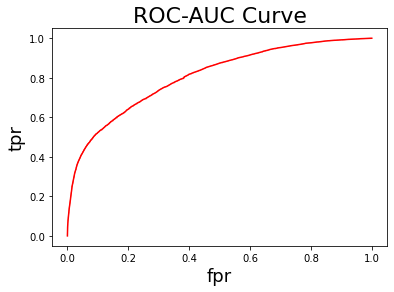

In [72]:
sns.lineplot(x=fpr,y=tpr,color='red')
plt.xlabel("fpr",fontsize=18)
plt.ylabel("tpr",fontsize = 18)
plt.title("ROC-AUC Curve",fontsize= 22)
plt.show()

#### LR_Vanilla_model

In [73]:
LR_Vanilla_model = LogisticRegression(penalty="l2",C=0.00001,class_weight="None")

In [74]:
LR_Vanilla_model.fit(X_train,y_train)

LogisticRegression(C=1e-05, class_weight='None')

In [75]:
y_train_predict_v = LR_Vanilla_model.predict(X_train)

In [76]:
y_train_prob_v = LR_Vanilla_model.predict_proba(X_train)

In [77]:
classification_matrix(y_train,y_train_predict_v)

precision :0.711541412647703  Recall :0.6611788802323019  F1_score :0.6854362930211931


(0.711541412647703, 0.6611788802323019, 0.6854362930211931)

In [78]:
thresholds = []
prec = []
recall = []
fbe = []
for threshold in range(10,100,10):
    thr = threshold/100
    y_pred_train2 = proba_class(y_train_prob_v,thr)
    print(f"Threshold{thr}")
    p,r,f = classification_matrix(y_train,y_pred_train2)
    prec.append(p)
    recall.append(r)
    fbe.append(f)
    thresholds.append(thr)

Threshold0.1
precision :0.5000032408397664  Recall :1.0  F1_score :0.6666695474069018
Threshold0.2
precision :0.5000032408397664  Recall :1.0  F1_score :0.6666695474069018
Threshold0.3
precision :0.5000032408397664  Recall :1.0  F1_score :0.6666695474069018
Threshold0.4
precision :0.5000032408397664  Recall :1.0  F1_score :0.6666695474069018
Threshold0.5
precision :0.711541412647703  Recall :0.6611788802323019  F1_score :0.6854362930211931
Threshold0.6
precision :0.0  Recall :0.0  F1_score :0.0
Threshold0.7
precision :0.0  Recall :0.0  F1_score :0.0
Threshold0.8
precision :0.0  Recall :0.0  F1_score :0.0
Threshold0.9
precision :0.0  Recall :0.0  F1_score :0.0


#### Best Score from Vanilla LR

Threshold0.5
precision :0.711541412647703  Recall :0.6611788802323019  F1_score 0.6854362930211931

#### KNN

In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn import metrics

In [80]:
reg_pipe = make_pipeline(StandardScaler(),KNeighborsRegressor())

In [81]:
reg_pipe.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsregressor', KNeighborsRegressor())])

In [83]:
y_train_pred = reg_pipe.predict(X_train)
y_test_pred= reg_pipe.predict(X_test)

In [84]:
train_rmse = np.sqrt(metrics.mean_squared_error(y_train,y_train_pred))
test_rmse = np.sqrt(metrics.mean_squared_error(y_test,y_test_pred))
(train_rmse,test_rmse)

(0.2976943568738435, 0.3609272049051787)

In [85]:
reg_pipe2 = make_pipeline(StandardScaler(),KNeighborsRegressor(n_neighbors=3))
reg_pipe2.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsregressor', KNeighborsRegressor(n_neighbors=3))])

In [86]:
cross_val_score(reg_pipe2,X_train,y_train,cv=5)

array([0.45468017, 0.45407939, 0.46087779, 0.46045823, 0.45708958])

#### Linear Regression

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [88]:
model = LinearRegression(normalize=True)

In [89]:
model.fit(X_train,y_train)

LinearRegression(normalize=True)

In [90]:
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [91]:
r2_train = r2_score(y_train,y_pred_train)
r2_test = r2_score(y_test,y_pred_test)

In [92]:
(r2_train,r2_test)

(0.27429545432728963, 0.27205343074112487)

In [93]:
np.sqrt(mean_squared_error(y_train,y_pred_train))

0.4259414706395181

In [94]:
np.sqrt(mean_squared_error(y_test,y_pred_test))

0.426598924369358